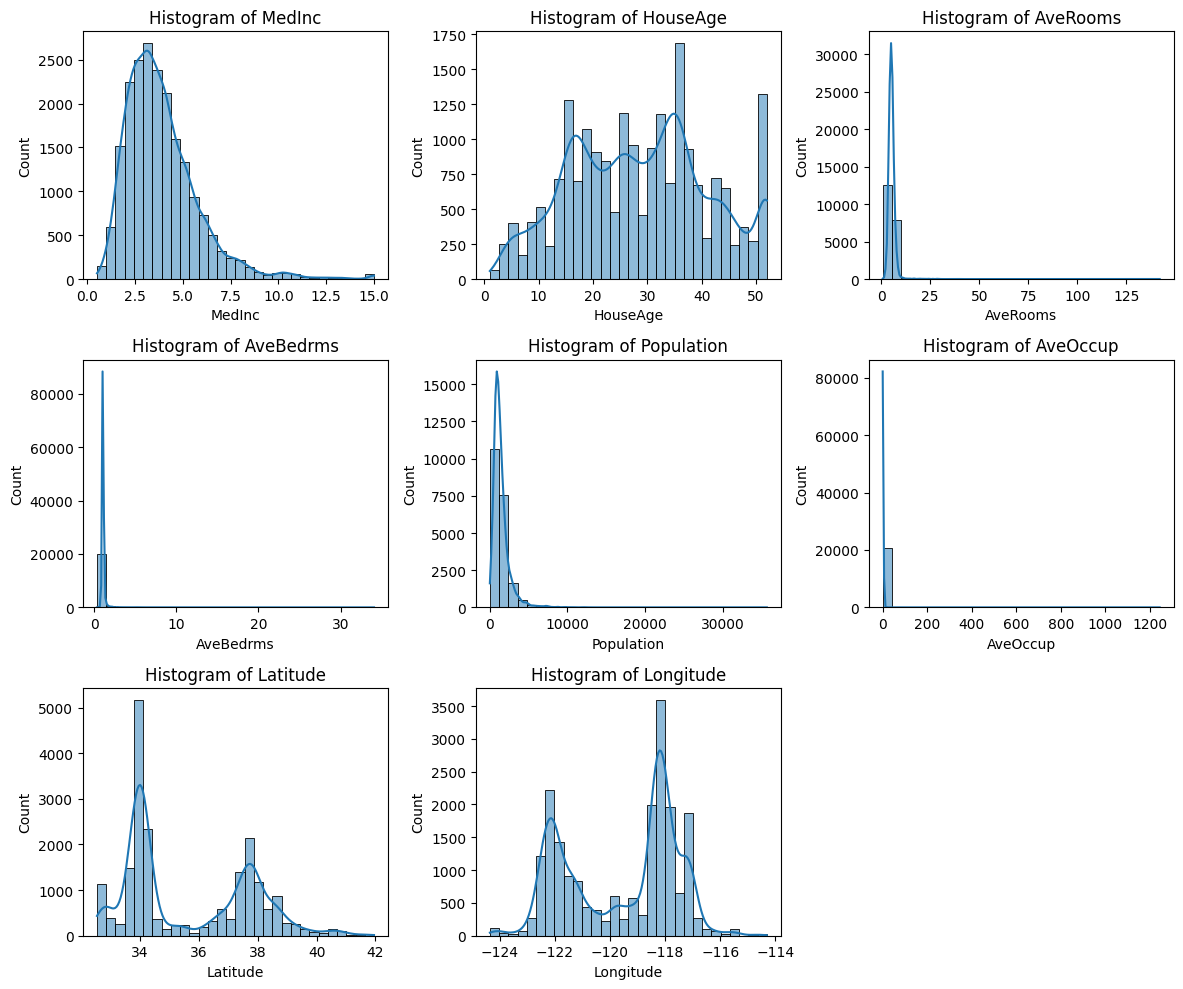

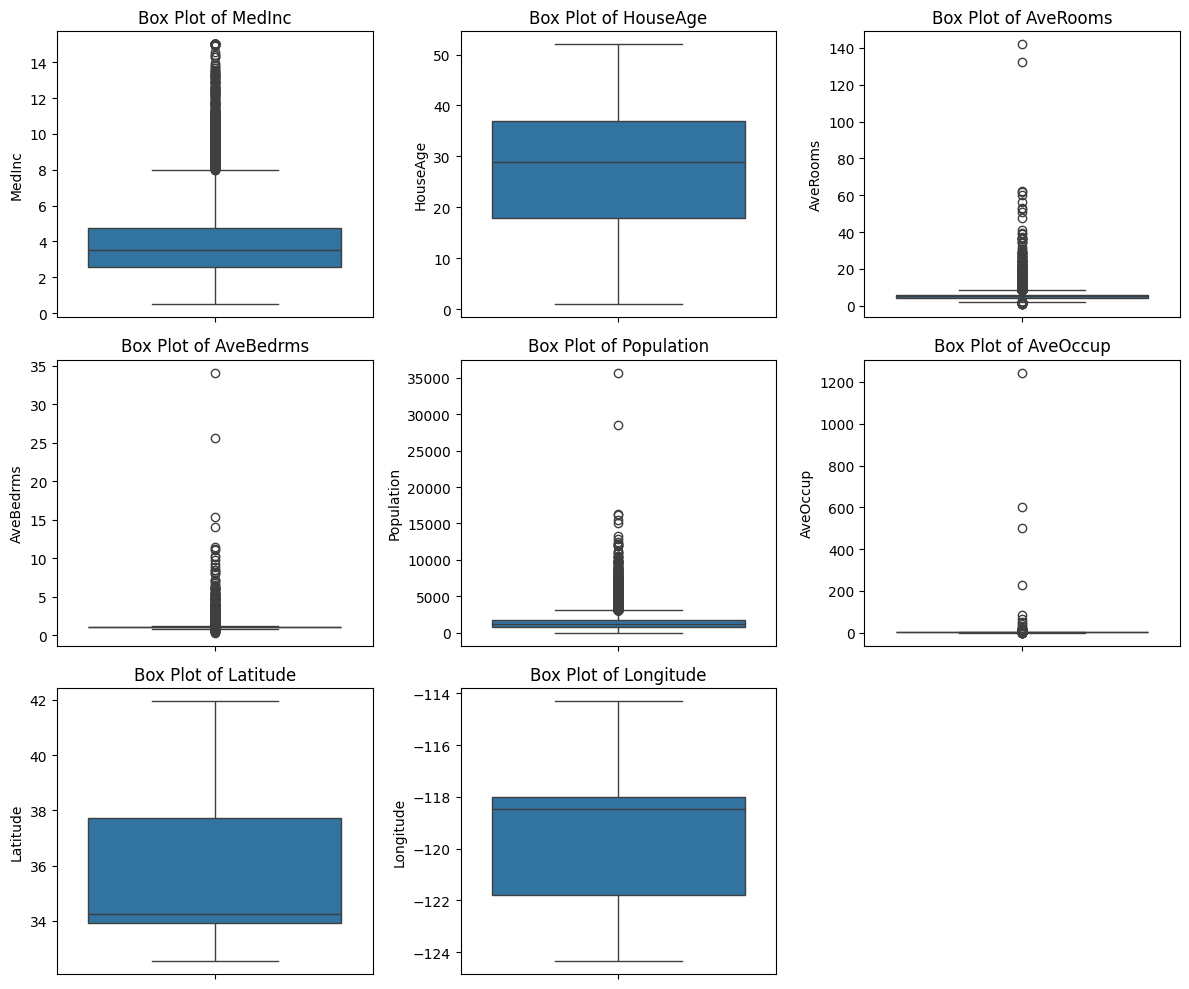

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
# Create histograms for all numerical features
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()
# Create box plots to identify outliers
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()


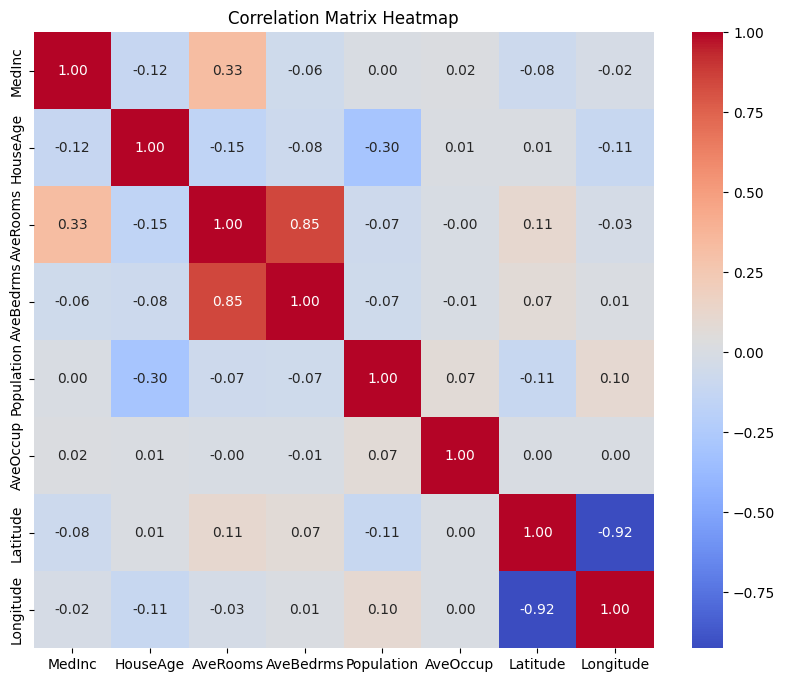

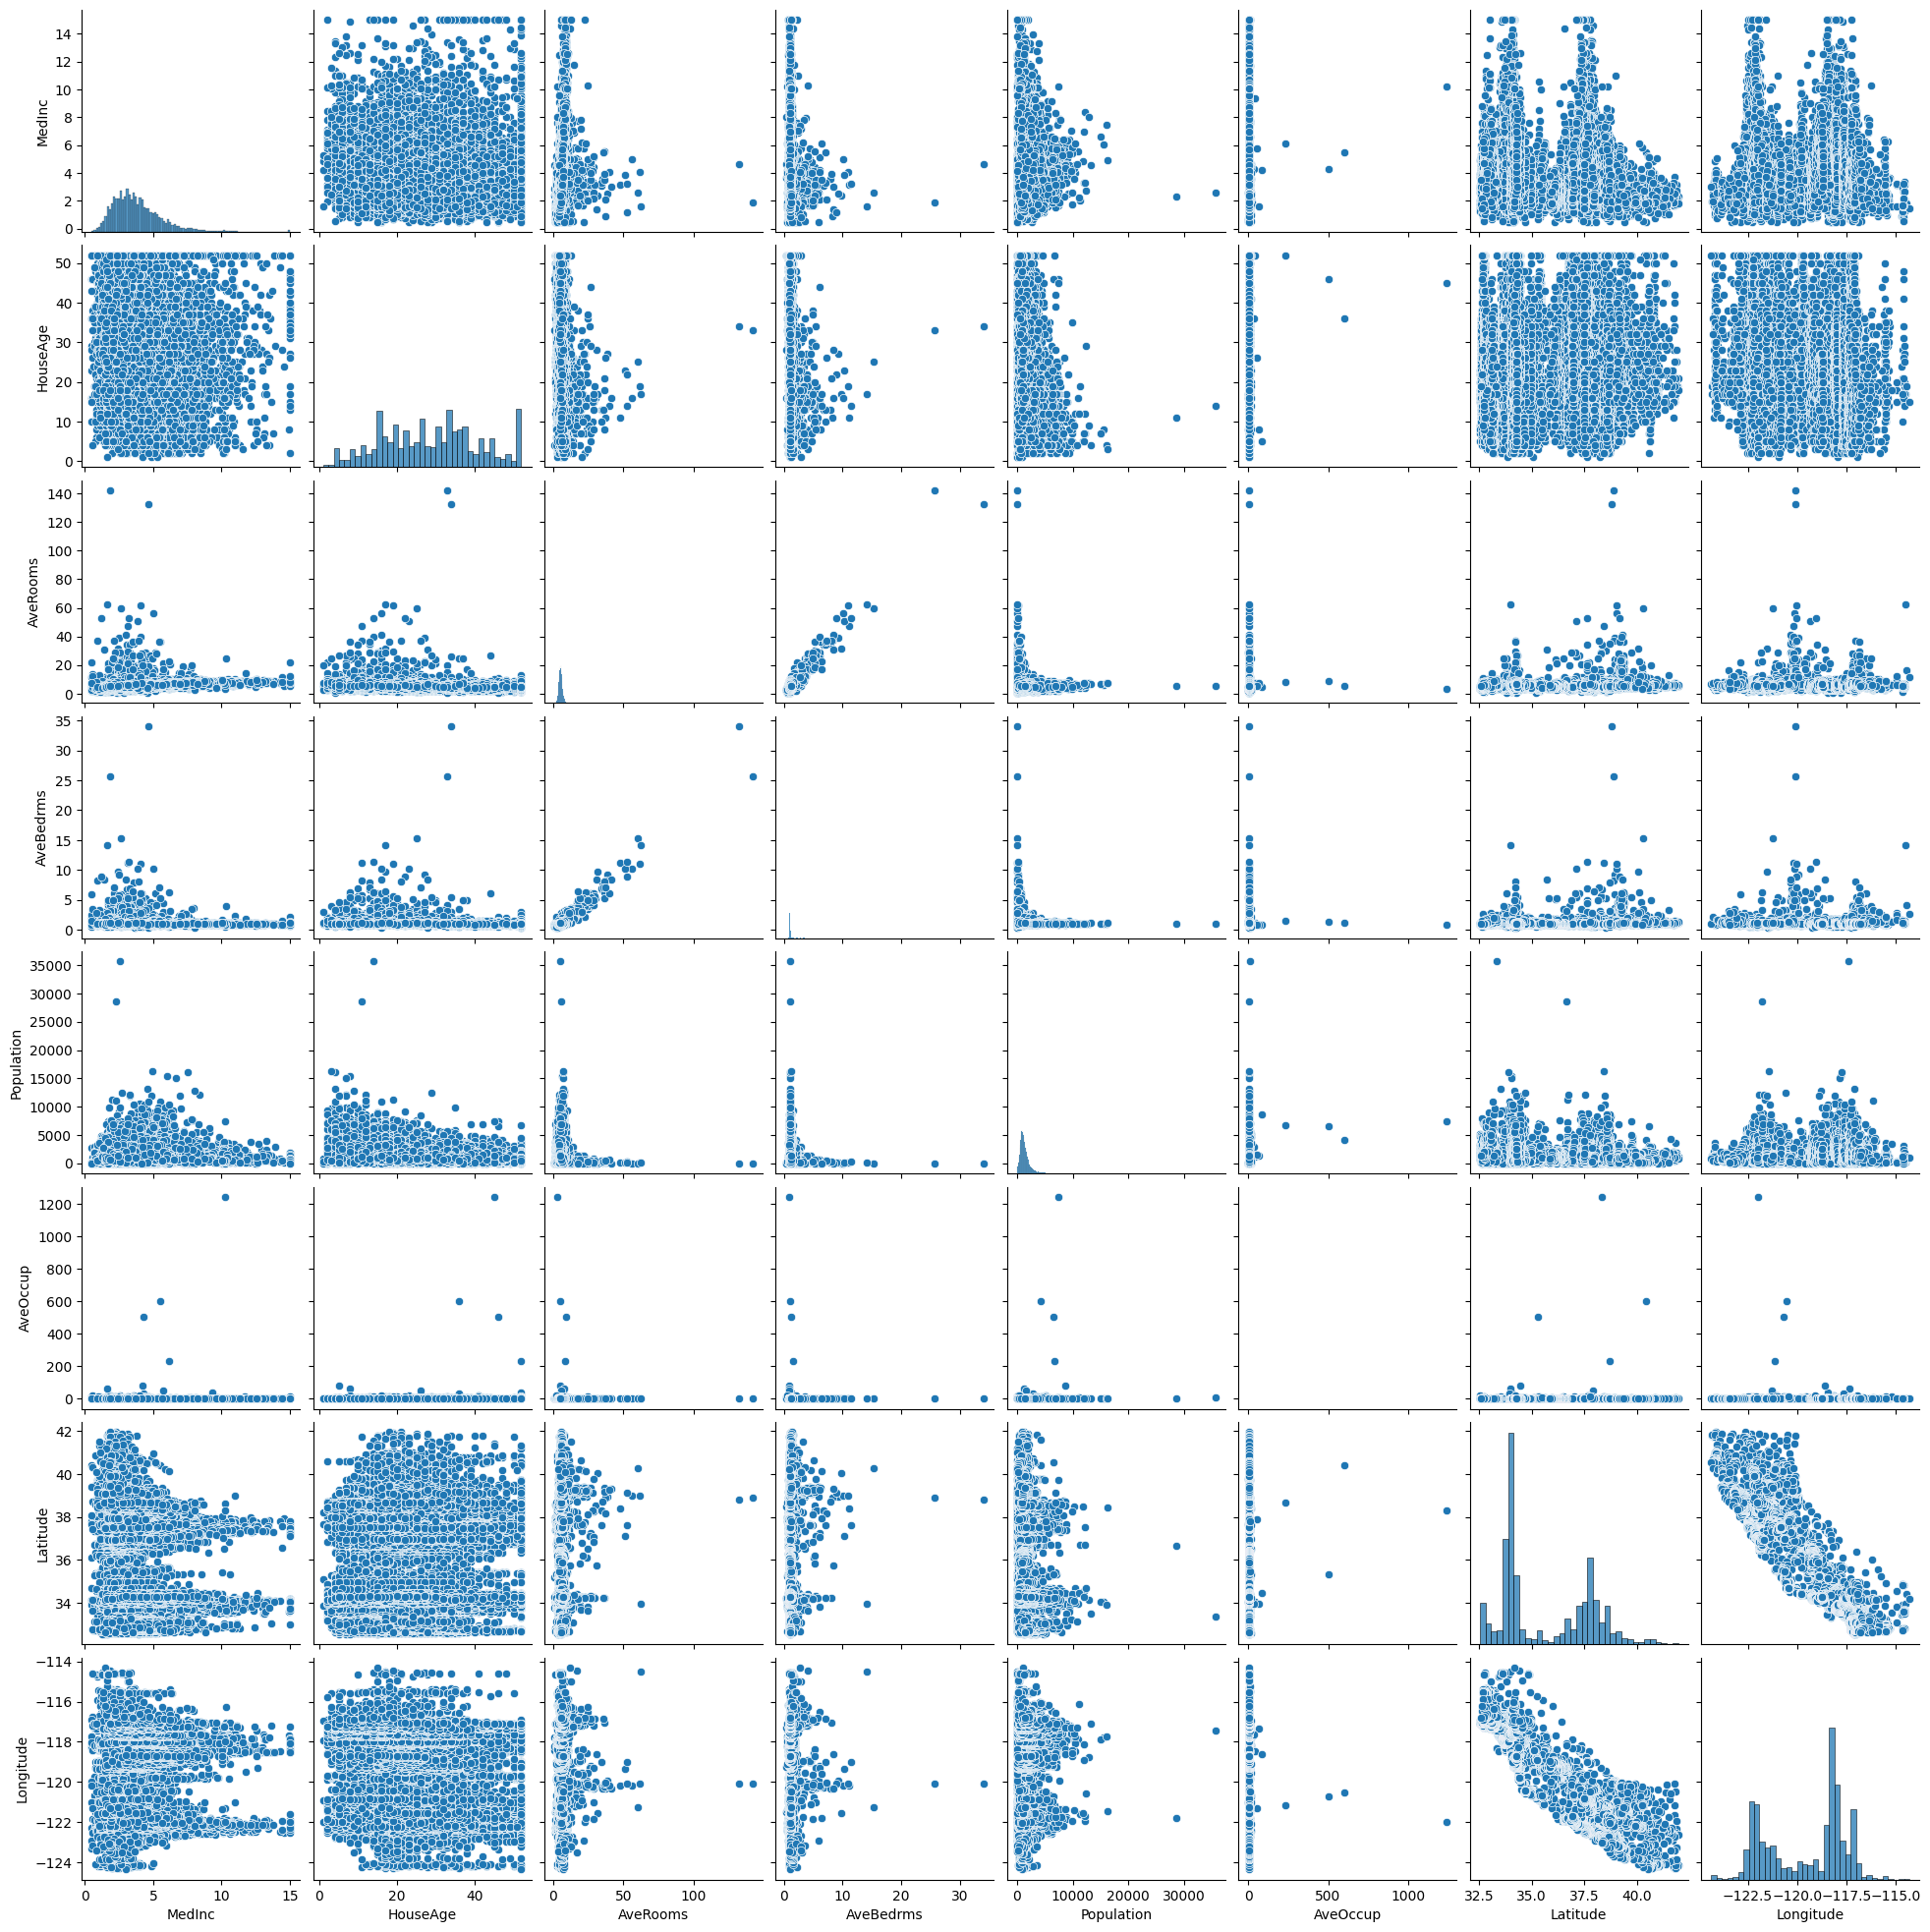

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
# Compute and visualize the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()
# Create a pair plot to visualize pairwise relationships
sns.pairplot(df)
plt.show()

Develop a program to implement Principal Component Analysis (PCA) for reducing the dimensionality of the Iris dataset from 4 features to 2.




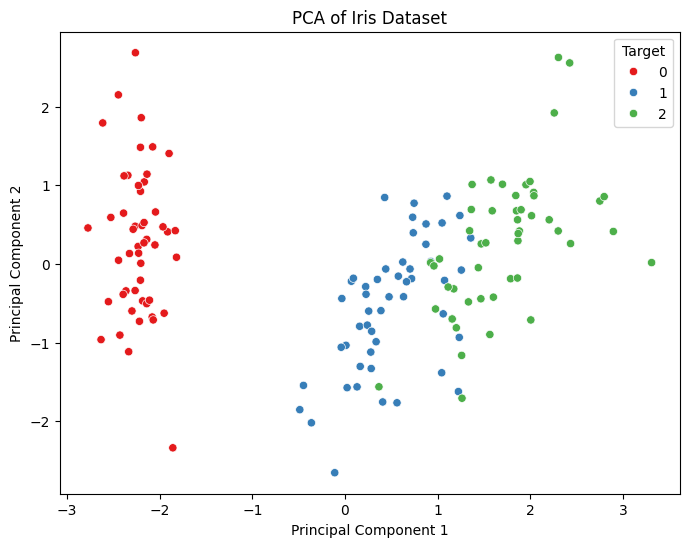

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
labels = data.target
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Apply PCA to reduce dimensions from 4 to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Target'] = labels
# Visualize the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=pca_df['Target'], palette='Set1', data=pca_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(title='Target')
plt.show()

In [7]:
import pandas as pd
import numpy as np
def find_s_algorithm(data):
    # Extract features and target
    X = data.iloc[:, :-1].values  # All columns except the last one (features)
    y = data.iloc[:, -1].values   # Last column (target)
     # Initialize the most specific hypothesis
    hypothesis = np.array(['?' for _ in range(X.shape[1])])
     # Iterate through the training examples
    for i, row in enumerate(X):
        if y[i] == 'Yes':  # Consider only positive examples
            if '?' in hypothesis:
                hypothesis = row.copy()  # First positive example initializes hypothesis
            else:
                for j in range(len(hypothesis)):
                    if hypothesis[j] != row[j]:
                        hypothesis[j] = '?'
    return hypothesis
# Load dataset from CSV file
data = pd.read_csv('training_data.csv')  # Ensure the CSV file has labeled columns with the target in the last column
# Run Find-S algorithm
hypothesis = find_s_algorithm(data)
# Output the final hypothesis
print(data)
print("The most specific hypothesis is:", hypothesis)


    Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3      Rain        Cold     High  False        Yes
4      Rain        Cold     High   True         No
5  Overcast         Hot     High   True        Yes
6     Sunny         Hot     High  False         No
The most specific hypothesis is: ['Overcast' 'Hot' 'High' True]


Results for k=1:
['Class1' 'Class2' 'Class1' 'Class2' 'Class1' 'Class1' 'Class1' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2' 'Class2'
 'Class2' 'Class1' 'Class1' 'Class2' 'Class1' 'Class2' 'Class1' 'Class1'
 'Class2' 'Class1' 'Class1' 'Class2' 'Class2' 'Class1' 'Class2' 'Class1'
 'Class1' 'Class2' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2'
 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2'
 'Class1' 'Class2']
Results for k=2:
['Class1' 'Class2' 'Class1' 'Class2' 'Class1' 'Class1' 'Class1' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2' 'Class2'
 'Class2' 'Class1' 'Class1' 'Class2' 'Class1' 'Class2' 'Class1' 'Class1'
 'Class2' 'Class1' 'Class1' 'Class2' 'Class2' 'Class1' 'Class2' 'Class1'
 'Class1' 'Class2' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2'
 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2'
 'Class1' 'Class2']
Results for k=3:
['Class1' 'Class2' 'Class1' 'Clas

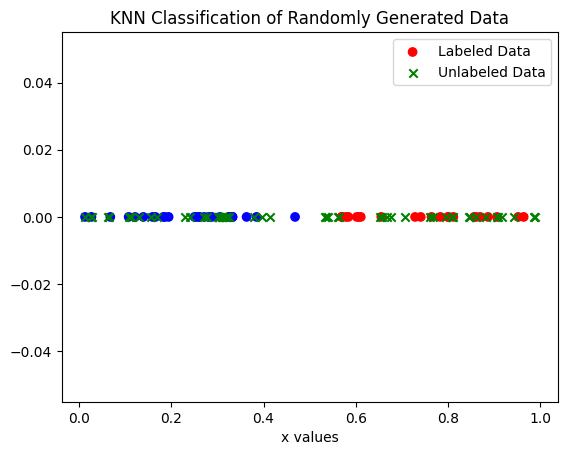

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate 100 random values in the range [0,1]
x_values = np.random.rand(100).reshape(-1, 1)

# Label the first 50 points
labels = np.array(["Class1" if x <= 0.5 else "Class2" for x in x_values[:50]])

# Train KNN and classify remaining points
k_values = [1, 2, 3, 4, 5, 20, 30]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_values[:50], labels)
    predicted_labels = knn.predict(x_values[50:])

    # Display results
    print(f"Results for k={k}:")
    print(predicted_labels)
    print("\n")

# Visualize classification
plt.scatter(x_values[:50], np.zeros(50), c=["blue" if x <= 0.5 else "red" for x in x_values[:50]], label='Labeled Data')
plt.scatter(x_values[50:], np.zeros(50), c='green', marker='x', label='Unlabeled Data')
plt.xlabel("x values")
plt.title("KNN Classification of Randomly Generated Data")
plt.legend()
plt.show()



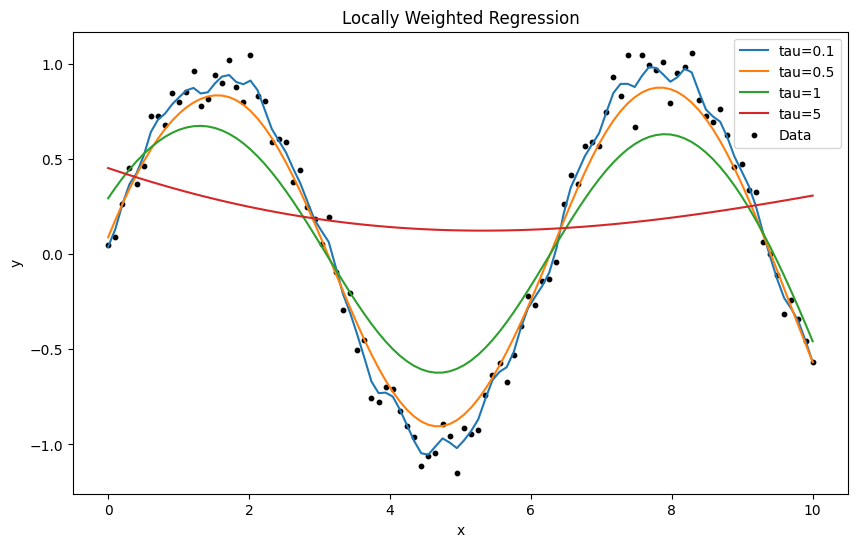

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv
# Generate synthetic dataset
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.1, size=x.shape)
# Locally Weighted Regression function
def locally_weighted_regression(x_train, y_train, x_test, tau):
    m = len(x_train)
    y_pred = np.zeros_like(x_test)
    for i, x0 in enumerate(x_test):
        weights = np.exp(-((x_train - x0) ** 2) / (2 * tau ** 2))
        W = np.diag(weights)
        X_b = np.c_[np.ones((m, 1)), x_train]  # Add bias term
        theta = inv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y_train)
        y_pred[i] = np.array([1, x0]) @ theta
    return y_pred
# Perform LWR for different tau values
tau_values = [0.1, 0.5, 1, 5]
plt.figure(figsize=(10, 6))
for tau in tau_values:
    y_pred = locally_weighted_regression(x, y, x, tau)
    plt.plot(x, y_pred, label=f'tau={tau}')
plt.scatter(x, y, color='black', s=10, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()

